
*************How to predict a timeseries using Multi Layer Perceptron in Keras**************
[[34639. 35663. 33217.]
 [35663. 33217. 36998.]
 [33217. 36998. 39308.]
 [36998. 39308. 30589.]
 [39308. 30589. 30438.]
 [30589. 30438. 37612.]
 [30438. 37612. 39761.]
 [37612. 39761. 40430.]
 [39761. 40430. 42225.]
 [40430. 42225. 43068.]
 [42225. 43068. 39245.]
 [43068. 39245. 44051.]
 [39245. 44051. 39579.]
 [44051. 39579. 48740.]
 [39579. 48740. 41917.]
 [48740. 41917. 52617.]
 [41917. 52617. 53773.]
 [52617. 53773. 42330.]
 [53773. 42330. 53631.]
 [42330. 53631. 53248.]
 [53631. 53248. 47116.]
 [53248. 47116. 60097.]
 [47116. 60097. 58337.]
 [60097. 58337. 63825.]
 [58337. 63825. 60416.]
 [63825. 60416. 56862.]
 [60416. 56862. 70489.]
 [56862. 70489. 73573.]
 [70489. 73573. 74291.]
 [73573. 74291. 74680.]
 [74291. 74680. 72868.]
 [74680. 72868. 80300.]
 [72868. 80300. 81810.]
 [80300. 81810. 76980.]]
[36998. 39308. 30589. 30438. 37612. 39761. 40430. 42225. 43068. 39245.
 44051. 39579. 487

Epoch 118/200
17/17 - 0s - loss: 106696864.0000
Epoch 119/200
17/17 - 0s - loss: 135930176.0000
Epoch 120/200
17/17 - 0s - loss: 157181616.0000
Epoch 121/200
17/17 - 0s - loss: 230550992.0000
Epoch 122/200
17/17 - 0s - loss: 152413408.0000
Epoch 123/200
17/17 - 0s - loss: 128002232.0000
Epoch 124/200
17/17 - 0s - loss: 184983664.0000
Epoch 125/200
17/17 - 0s - loss: 141896848.0000
Epoch 126/200
17/17 - 0s - loss: 161041328.0000
Epoch 127/200
17/17 - 0s - loss: 90358800.0000
Epoch 128/200
17/17 - 0s - loss: 190795216.0000
Epoch 129/200
17/17 - 0s - loss: 68383832.0000
Epoch 130/200
17/17 - 0s - loss: 106371904.0000
Epoch 131/200
17/17 - 0s - loss: 143823296.0000
Epoch 132/200
17/17 - 0s - loss: 103520240.0000
Epoch 133/200
17/17 - 0s - loss: 114165504.0000
Epoch 134/200
17/17 - 0s - loss: 102952936.0000
Epoch 135/200
17/17 - 0s - loss: 104220096.0000
Epoch 136/200
17/17 - 0s - loss: 81491736.0000
Epoch 137/200
17/17 - 0s - loss: 81388936.0000
Epoch 138/200
17/17 - 0s - loss: 173946864.0

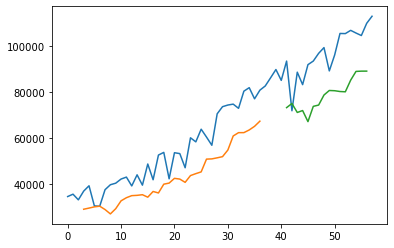


Execution Time 4.723037958145142 seconds: 


In [7]:
# To predict a timeseries using Multi Layer Perceptron 

def Snippet_393(): 

    print()
    print(format('How to predict a timeseries using Multi Layer Perceptron in Keras','*^92'))

    # load libraries
    import pandas, time
    import numpy as np
    from keras.layers.core import Dense, Dropout
    from keras.optimizers import RMSprop
    from keras.models import Sequential
    import matplotlib.pyplot as plt

    start_time = time.time()    

    # load the dataset
    dataframe = pandas.read_csv('rice production of India.csv', usecols=[1], 
                                engine='python', skipfooter=3)
    dataset = dataframe.values; dataset = dataset.astype('float32')

    # split into train and test sets
    train_size = int(len(dataset) * 0.67) 
    train_dataset, test_dataset = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

    # Window -> X timestep back
    step_back = 3
    X_train, Y_train = [], []
    for i in range(len(train_dataset)-step_back - 1):
        a = train_dataset[i:(i+step_back), 0]
        X_train.append(a)
        Y_train.append(train_dataset[i + step_back, 0])
    X_train = np.array(X_train); Y_train = np.array(Y_train);
    
    X_test, Y_test = [], []
    for i in range(len(test_dataset)-step_back - 1):
        a = test_dataset[i:(i+step_back), 0]
        X_test.append(a)
        Y_test.append(test_dataset[i + step_back, 0])
    X_test = np.array(X_test); Y_test = np.array(Y_test);

    print(X_train); print(Y_train);             print(X_test); print(Y_test);

    # -------------------------------------
    # setup a MLP network in keras
    # -------------------------------------
    model = Sequential()
    model.add(Dense(units = 128, input_dim=step_back, activation='relu'))
    model.add(Dropout(0.2))    
    model.add(Dense(units = 64,  input_dim=step_back, activation='relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(units = 1, activation = 'linear'))
    model.summary()
    model.compile(loss='mean_squared_error', optimizer=RMSprop(lr = 0.01))
    model.fit(X_train, Y_train, epochs=200, batch_size=2, verbose=2)    

    # Estimate model performance
    print()
    trainScore = model.evaluate(X_train, Y_train, verbose=1)
    print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
    testScore = model.evaluate(X_test, Y_test, verbose=1)
    print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore))) 

    # Evaluate the skill of the Trained model
    trainPredict = np.array(model.predict(X_train))
    trainPredict = np.reshape(trainPredict, (len(trainPredict), 1))
    testPredict = np.array(model.predict(X_test))
    testPredict = np.reshape(testPredict, (len(testPredict), 1))    

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[step_back:len(trainPredict)+step_back, :] = trainPredict

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(step_back*2)+1:len(dataset)-1, :] = testPredict

    # plot baseline and predictions
    plt.plot(dataset)
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()

    print(); print("Execution Time %s seconds: " % (time.time() - start_time))

Snippet_393()